In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import GridSearchCV
#########################################################
import seaborn as sns
#%matplotlib inline
import missingno as msno
from imblearn.over_sampling import SMOTE
#import warnings
#warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
df = pd.read_csv("/content/Drive/MyDrive/weather dataset/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Checking for null values
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
#informations statistiques de l'ensemble de données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
# Identification des colonnes numériques et d'objets
Object=[]
Numeric = []

for i in df.columns:
    if df[i].dtype =="object":
        Object.append(i)
        
    else:
        Numeric.append(i)

print("Categorical:",Object)
print("Continuous:", Numeric)

Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Continuous: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


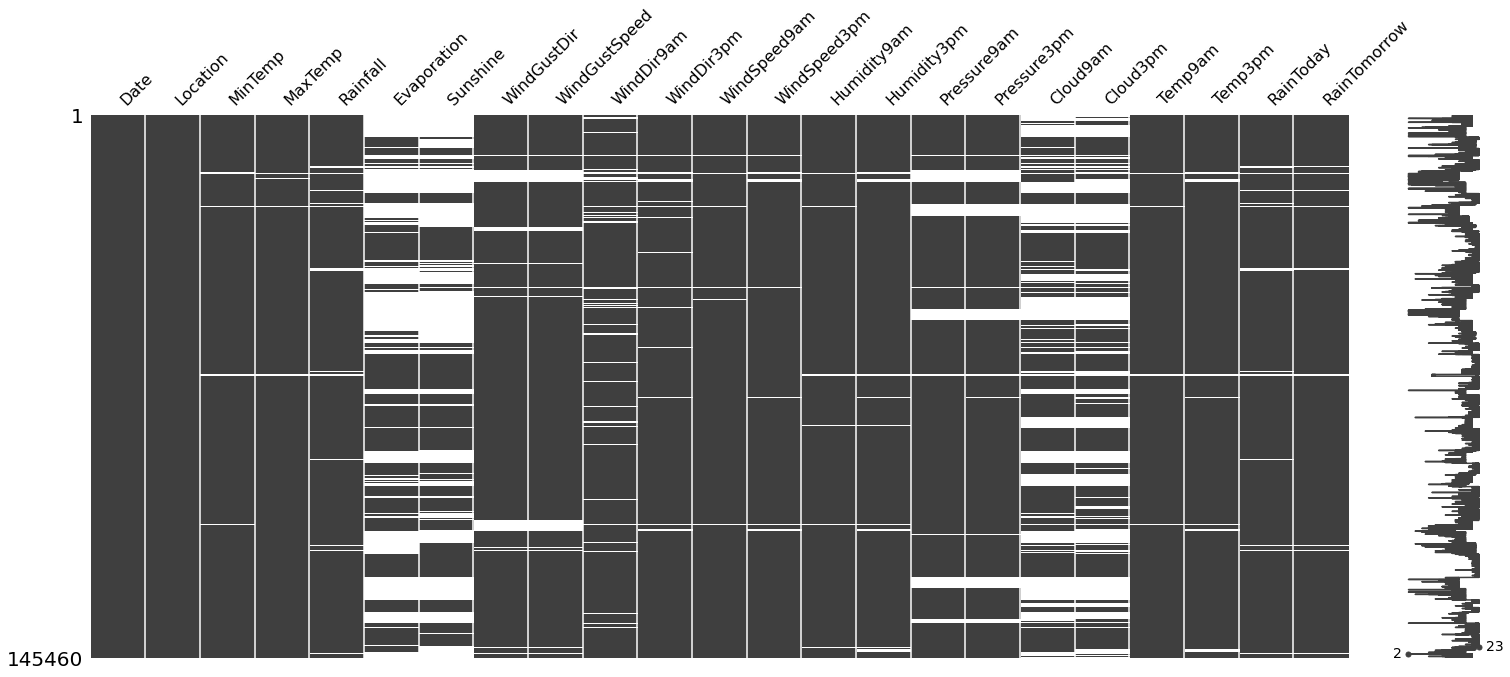

In [ ]:
#Visualisation des valeurs manquantes dans l'ensemble de données
msno.matrix(df)

après avoir vu les données et quelques informations à ce sujet. maintenant, nous allons essayer de le prétraiter en remplissant les valeurs manquantes et en transformant les données catégorielles en données numériques.

In [ ]:
df.RainToday[df.RainToday == 'Yes'] = 1
df.RainToday[df.RainToday == 'No'] = 0

df.RainTomorrow[df.RainTomorrow == 'Yes'] = 1
df.RainTomorrow[df.RainTomorrow == 'No'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# remplir les valeurs manquantes pour les variables numériques avec la moyenne
df["MinTemp"]= df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]= df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Evaporation"]= df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"]= df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindGustSpeed"]= df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["Rainfall"]= df["Rainfall"].fillna(df["Rainfall"].mean())
df["WindSpeed9am"]= df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]= df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]= df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]= df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]= df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]= df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"]= df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"]= df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"]= df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]= df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [ ]:
#remplir les valeurs manquantes pour les variables catégorielles avec mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [ ]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

après avoir éliminé les valeurs manquantes, nous allons
1. voir les données corrélées via la carte thermique, puis supprimer les colonnes inutiles
2. Transformez les colonnes catégorielles en colonnes numériques à l'aide de l'encodeur d'étiquette
3. catégoriser la colonne de date en 4 saisons (hiver, printemps, été, automne)

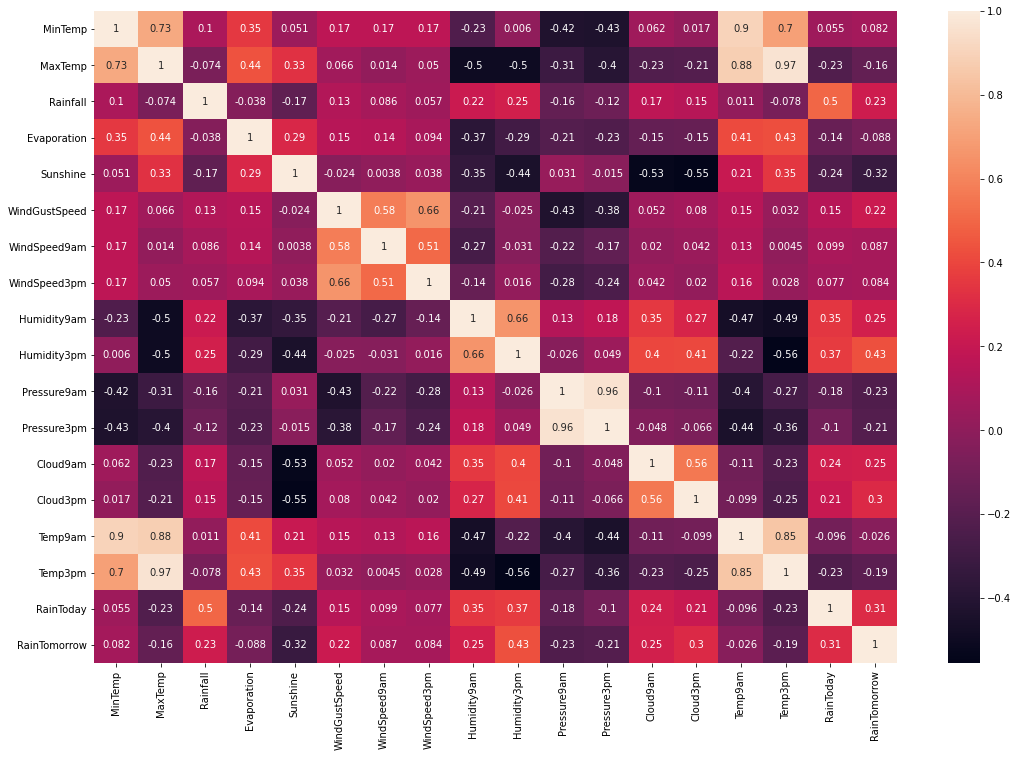

In [ ]:
#carte de chaleur
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

Inférences de Heatmap:

* MinTemp et Temp9am fortement corrélés.
* MinTemp et Temp3pm fortement corrélés.
* MaxTemp et Temp9am fortement corrélés.
* MaxTemp et Temp3pm fortement corrélés.
* Temp3pm et Temp9am fortement corrélés.
* MaxTemp et MinTemp fortement corrélés.
* Humidité 9h et Humidité 3h hautement corrélées.
* Pressure9am et Pressure3pm fortement corrélés. 

In [ ]:
# Suppression de colonnes hautement corrélées
df=df.drop(['Temp3pm','Temp9am','Humidity9am','MaxTemp','Pressure3pm'],axis=1)

df.columns


Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#transformer les colonnes catégorielles en colonnes numériques à l'aide de l'encodeur d'étiquette
label_encoder = LabelEncoder()
df["Location"] = label_encoder.fit_transform(df["Location"])
df["WindDir9am"]= label_encoder.fit_transform(df["WindDir9am"])
df["WindDir3pm"]= label_encoder.fit_transform(df["WindDir3pm"])
df["WindGustDir"] = label_encoder.fit_transform(df["WindGustDir"])

In [ ]:
df.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,22.0,1007.7,8.000000,4.50993,0,0
1,2008-12-02,2,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,25.0,1010.6,4.447461,4.50993,0,0
2,2008-12-03,2,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,30.0,1007.6,4.447461,2.00000,0,0
3,2008-12-04,2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,16.0,1017.6,4.447461,4.50993,0,0
4,2008-12-05,2,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,33.0,1010.8,7.000000,8.00000,0,0


In [ ]:
#et maintenant, comme étape finale du prétraitement des données, nous allons transformer la colonne de date en 4 saisons 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Cloud9am       145460 non-null  float64
 15  Cloud3pm       145460 non-null  float64
 16  RainToday      145460 non-null  int64  
 17  RainTomorrow   145460 non-nul

le type de colonne de date est objet, nous devons d'abord le convertir en type de date

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   Rainfall       145460 non-null  float64       
 4   Evaporation    145460 non-null  float64       
 5   Sunshine       145460 non-null  float64       
 6   WindGustDir    145460 non-null  int64         
 7   WindGustSpeed  145460 non-null  float64       
 8   WindDir9am     145460 non-null  int64         
 9   WindDir3pm     145460 non-null  int64         
 10  WindSpeed9am   145460 non-null  float64       
 11  WindSpeed3pm   145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Cloud9am       145460 non-null  float64       
 15  

après l'avoir transformé en type de date, nous le convertirons en saisons:
1. [décembre, février]: hiver
2. [mars, mai]: printemps
3. [juin, août]: été
4. [septembre, novembre]: automne

In [ ]:
def to_season(m):
    if ((m==12)|(m==1)|(m==2)):
        return 1#"winter"
    elif ((m==3)|(m==4)|(m==5)):
        return 2#"spring"
    elif ((m==6)|(m==7)|(m==8)):
        return 3#"summer"
    elif ((m==9)|(m==10)|(m==11)):
        return 4#"autumn"

df["Date"] = df["Date"].dt.month.map(to_season)



In [ ]:
df.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,1,2,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,22.0,1007.7,8.000000,4.50993,0,0
1,1,2,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,25.0,1010.6,4.447461,4.50993,0,0
2,1,2,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,30.0,1007.6,4.447461,2.00000,0,0
3,1,2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,16.0,1017.6,4.447461,4.50993,0,0
4,1,2,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,33.0,1010.8,7.000000,8.00000,0,0


In [ ]:
## maintenant nous renommerons la colonne (Date => Saison)
df.rename(columns = {'Date': 'Season'}, inplace = True)


ps : nous avons transformé la colonne de date en saison pour l'utiliser plus tard dans l'approche contextuelle

#  Après avoir traité les données, nous allons maintenant créer, former et optimiser deux modèles de forêt aléatoire et d'arbre de décision.

# 1. modéle de Decision Tree

In [ ]:
X = df.drop("RainTomorrow", axis = 1)
Y = df['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)


In [ ]:
DTmodel=DecisionTreeClassifier()

In [ ]:
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DTprediction_test = DTmodel.predict(X_test)

In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, DTprediction_test))

Accuracy =  0.781417571841056


In [ ]:
#maintenant nous allons essayer d'optomiser l'Accuracy en utilisant la validation croisée comme nous avons l'hbitude de faire et en jouant sur plusieurs paramétres
DTparam_grid = [
              {'max_depth' : list(range(2,45)),
               'criterion' :['gini', 'entropy']},
                       
                       ]


In [ ]:
DToptimal_params = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)

In [ ]:
DToptimal_params.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(DToptimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 8}


In [ ]:
DTmodel_optimized=DecisionTreeClassifier(criterion='gini',max_depth=8)

In [ ]:
DTmodel_optimized.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DTprediction_test_optimized = DTmodel_optimized.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, DTprediction_test_optimized))

Accuracy =  0.8368623676612127


L'Accuray s'est augmentée aprés avoir utilisé la validation croisée avec le meilleur paramétre , ca c'est bon

In [ ]:
# sauvegarder le modéle aprés avoir eu une bonne Accuracy
filename = '/content/Drive/MyDrive/weather models/model_optimized_DecisionTree_weather_83-686.sav'
pickle.dump(DTmodel_optimized, open(filename, 'wb'))

In [ ]:
#Matrice de confusion 
cm1 = metrics.confusion_matrix(y_test,DTprediction_test_optimized)
print(cm1)

[[21480  1192]
 [ 3554  2866]]


In [ ]:
#architecture du modéle
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(DTmodel_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 2. le modéle des forêts aléatoires (RandomForest)

In [ ]:
RFmodel = RandomForestClassifier(n_estimators = 11, random_state = 13)

In [ ]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
RFprediction_test = RFmodel.predict(X_test)

In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, RFprediction_test))

Accuracy =  0.8416403134882442


In [ ]:
#augmentation de l'Accuracy en utilsant la validation croisée toujours
RFparam_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                          'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15, 16, 17, 18, 19, 20,21]}]

In [ ]:
RFoptimal_params = GridSearchCV(
    RandomForestClassifier(),
    RFparam_grid,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
RFoptimal_params.fit(X_train,y_train)

Fitting 3 folds for each of 340 candidates, totalling 1020 fits
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=5 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=5, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=6 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=6, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] ...... criterion=gini, max_depth=5, n_estimators=7, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=7 .....................
[CV] .

[Parallel(n_jobs=1)]: Done 1020 out of 1020 | elapsed: 22.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(RFoptimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 21}


In [ ]:
RFmodel_optimized = RandomForestClassifier(n_estimators =21,max_depth=13,criterion='gini', random_state = 13)

In [ ]:
RFmodel_optimized.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
RFprediction_test_optimized = RFmodel_optimized.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, RFprediction_test_optimized))

Accuracy =  0.8449401897428847


PAS MAL !!!!

après une forêt aléatoire, nous n'avons pas fait une grande différence, mais cela fait toujours la différence, 

In [ ]:
# sauvegarder le modéle
filename = '/content/Drive/MyDrive/weather models/model_optimized_RandomForest_weather_84-494.sav'
pickle.dump(RFmodel_optimized, open(filename, 'wb'))

In [ ]:
#matrice de confusion 
cm2 = metrics.confusion_matrix(y_test,RFprediction_test_optimized)
print(cm2)

[[21652  1020]
 [ 3491  2929]]


In [ ]:
#bar
feature_list = list(X.columns)
feature_imp = pd.Series(RFmodel_optimized.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Humidity3pm      0.298009
Rainfall         0.101187
Sunshine         0.080864
Pressure9am      0.071480
WindGustSpeed    0.070378
RainToday        0.065482
Cloud3pm         0.052926
MinTemp          0.043560
Cloud9am         0.031239
Location         0.030070
WindSpeed3pm     0.027493
WindDir3pm       0.025012
Evaporation      0.023779
WindDir9am       0.023595
WindSpeed9am     0.023365
WindGustDir      0.021082
Season           0.010479
dtype: float64


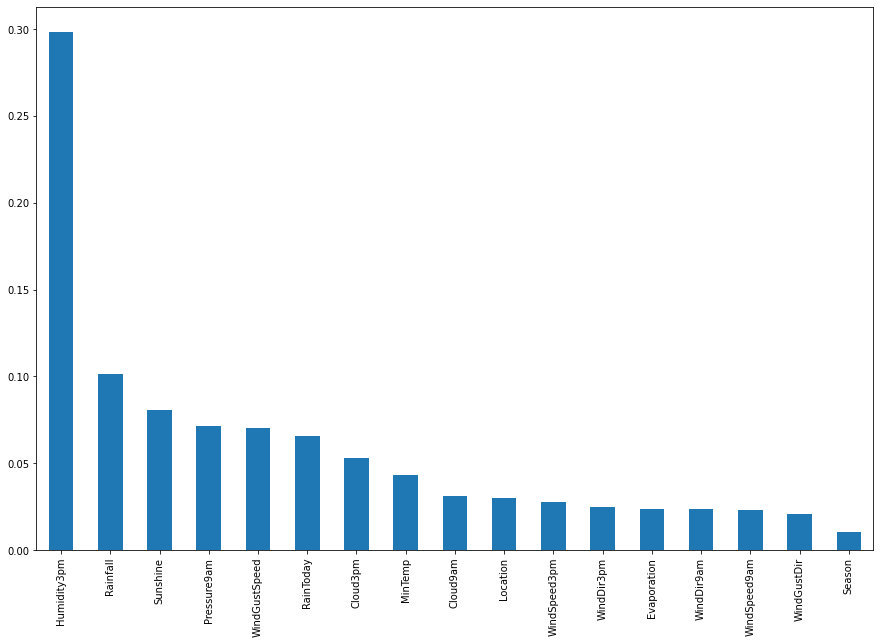

In [ ]:
feature_imp.plot(kind='bar',figsize=(15,10))

#Dans la section ci-dessous, nous visualiserons les données, cela devrait provenir des premières lignes mais nous laissons la dernière pour rendre le cahier plus ordonné et plus facile à lire

In [ ]:
!pip install AutoViz


In [ ]:
#importation de la classe Autoviz
from autoviz.AutoViz_Class import AutoViz_Class

#Initialiser la classe Autoviz
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [ ]:
#Visualization pour toutes les variables 

dftc = AV.AutoViz('/content/Drive/MyDrive/weather dataset/weatherAUS.csv')

In [ ]:
#Visualization for independant Vs Dependant variable
dftc = AV.AutoViz(filename='/content/Drive/MyDrive/weather dataset/weatherAUS.csv', 
                  sep ='' , 
                  depVar ='RainTomorrow', 
                  dfte =df, 
                  header = 0, 
                  verbose = 1, 
                  lowess = False, 
                  chart_format ='png', 
                  max_rows_analyzed = 150000, 
                  max_cols_analyzed = 30)